In [15]:
import jovian
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import time
import PIL.Image as Image
from IPython.display import display

In [16]:
root_path = '/Users/axelsiliezar/Downloads/Mangos/PokemonData'
classes = sorted(os.listdir(root_path))
print(len(classes),classes)

150 ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking',

Total number of pokemons: 150
Total number of images: 6837


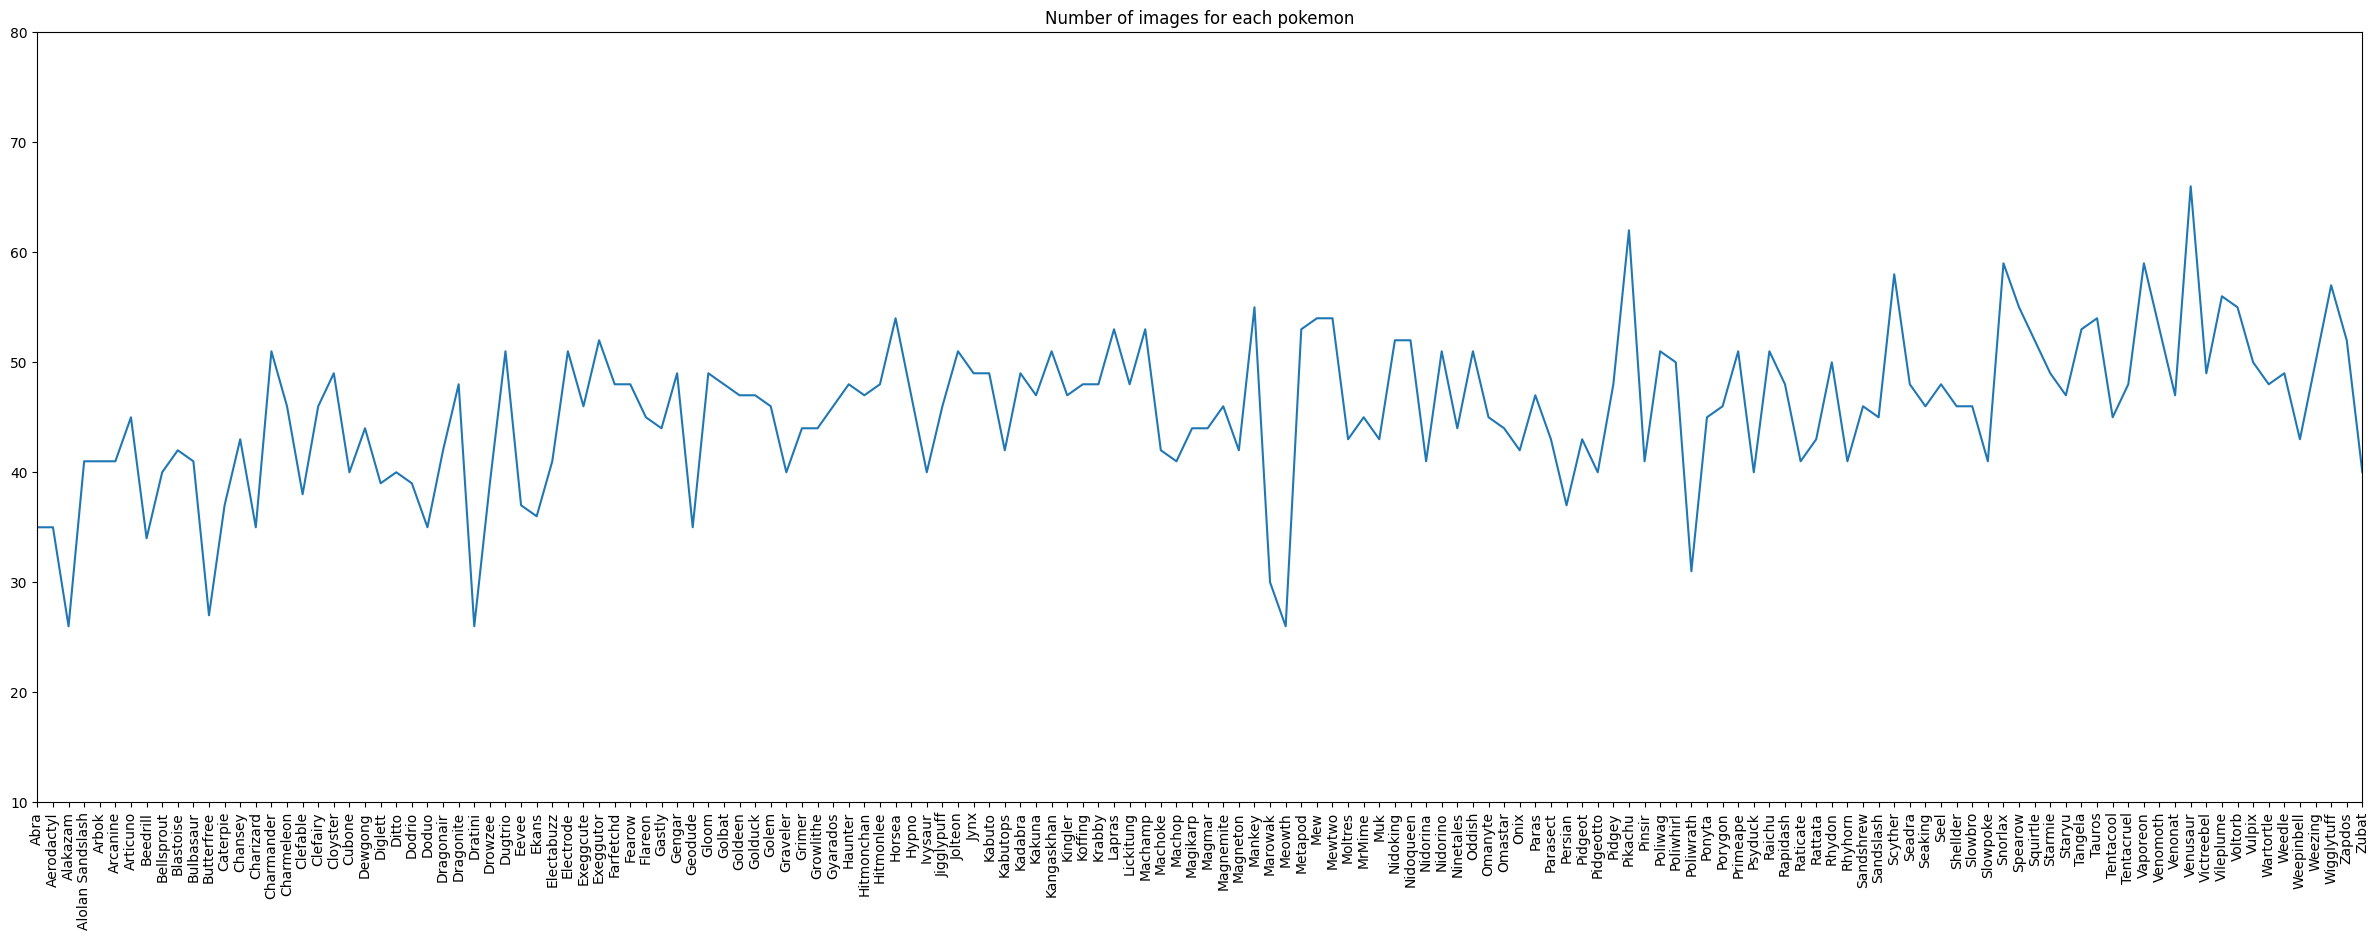

In [17]:
count=0
count_dict = {}
print(f'Total number of pokemons: {len(classes)}')
for pokemon in classes:
    dir_path = os.path.join(root_path,pokemon)
    count+=len(os.listdir(dir_path))
    count_dict[pokemon] = len(os.listdir(dir_path))
print(f'Total number of images: {count}')
fig = plt.figure(figsize = (30, 10))
sns.lineplot(x = list(count_dict.keys()), y = list(count_dict.values())).set_title('Number of images for each pokemon')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.ylim(10,80)
plt.show()

In [18]:
sorted_list =  sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
sorted_list

[('Venusaur', 66),
 ('Pikachu', 62),
 ('Snorlax', 59),
 ('Vaporeon', 59),
 ('Scyther', 58),
 ('Wigglytuff', 57),
 ('Vileplume', 56),
 ('Mankey', 55),
 ('Spearow', 55),
 ('Voltorb', 55),
 ('Horsea', 54),
 ('Mew', 54),
 ('Mewtwo', 54),
 ('Tauros', 54),
 ('Lapras', 53),
 ('Machamp', 53),
 ('Metapod', 53),
 ('Tangela', 53),
 ('Venomoth', 53),
 ('Exeggutor', 52),
 ('Nidoking', 52),
 ('Nidoqueen', 52),
 ('Squirtle', 52),
 ('Zapdos', 52),
 ('Charmander', 51),
 ('Dugtrio', 51),
 ('Electrode', 51),
 ('Jolteon', 51),
 ('Kangaskhan', 51),
 ('Nidorino', 51),
 ('Oddish', 51),
 ('Poliwag', 51),
 ('Primeape', 51),
 ('Raichu', 51),
 ('Poliwhirl', 50),
 ('Rhydon', 50),
 ('Vulpix', 50),
 ('Weezing', 50),
 ('Cloyster', 49),
 ('Gengar', 49),
 ('Gloom', 49),
 ('Jynx', 49),
 ('Kabuto', 49),
 ('Kadabra', 49),
 ('Starmie', 49),
 ('Victreebel', 49),
 ('Weedle', 49),
 ('Dragonite', 48),
 ('Farfetchd', 48),
 ('Fearow', 48),
 ('Golbat', 48),
 ('Haunter', 48),
 ('Hitmonlee', 48),
 ('Koffing', 48),
 ('Krabby', 48),

In [19]:
dataset_dir = root_path

tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [20]:
dataset = torchvision.datasets.ImageFolder(root=dataset_dir, transform = tfms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 400, 400])
Label (numeric): 0
Label (textual): Abra


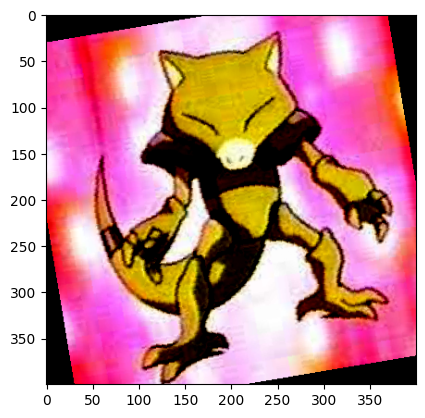

In [21]:
img, label = dataset[0]
print(img.shape)
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [22]:
torch.manual_seed(100)

In [23]:
train_size = int(len(dataset)*0.85)
val_size = int(len(dataset)*0.15)

In [24]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(5797, 1023)

In [25]:
trainloader = DataLoader(train_ds, batch_size = 32, shuffle=True, num_workers = 2)
testloader = DataLoader(val_ds, batch_size = 32, shuffle=False, num_workers = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 400, 400])


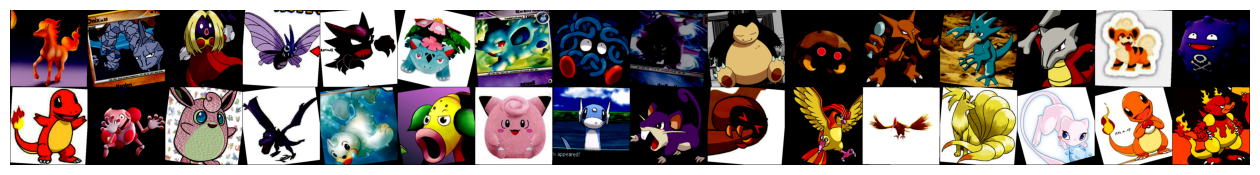

In [26]:
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 5):

    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(trainloader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100/32*running_correct/len(trainloader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))

        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)

        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies